## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 


To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

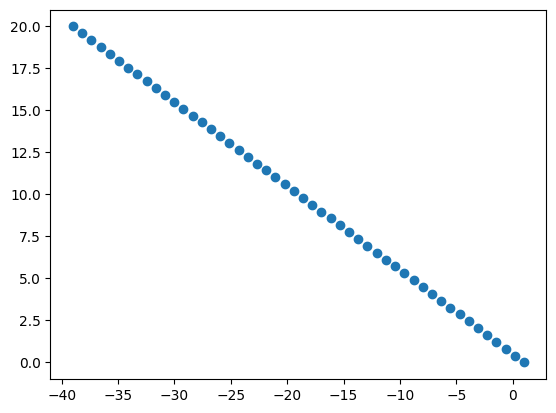

In [ ]:
plt.scatter(y,X)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [5]:

def batch_gradient_descent(X, y, LR=0.0005, max_iter=300, 
                          gradient_threshold=0.001, cost_threshold=0.001):
    # 1- initialize
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    # stored data for visualization
    stored_theta_0 = []
    stored_theta_1 = []
    stored_loss = []


    for iter in range(max_iter):
        print(f'****************** Iteration {iter} ********************')
        # 2- predict
        h = theta_1 * X + theta_0
        print('h(x): ')
        print(h)
        print()
        # 3- error
        error = h - y
        j = (1/(2*m)) * np.sum(error**2)
        stored_loss.append(j)
        print('Error vector ')
        print(error)
        print
        print('j= ')
        print(j)
        print()
        
        # 4- gradient
        grad_0 = (1/m) * np.sum(error)
        grad_1 = (1/m) * np.sum(error * X)
        grad_vector = np.array([grad_0, grad_1])
        grad_vector_norm = np.sqrt(grad_0**2 + grad_1**2)
        print('grad vector ')
        print(grad_vector)
        print('grad vector norm ')
        print(grad_vector_norm)


        # 5- update
        theta_0 -= LR * grad_0; stored_theta_0.append(theta_0)
        theta_1 -= LR * grad_1; stored_theta_1.append(theta_1)
        print('theta 0 new ', theta_0)
        print('theta 1 new ', theta_1)

        ### Cost Check -> stop if the change in cost is very low
        if iter>1:
            if abs(stored_loss[-2] - stored_loss[-1]) < cost_threshold:
                print('cost check, iter ', iter)
                break
        
        ### Gradient Check -> stop if the the change in gradient is very slow 
        if (np.sqrt(theta_0**2 + theta_1**2) < gradient_threshold):
            print('gradient check, iter ', iter)
            break
    return h, theta_0, theta_1, stored_theta_0, stored_theta_1, stored_loss

        

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
h, theta_0, theta_1, stored_theta_0, stored_theta_1, stored_loss = batch_gradient_descent(X, y, LR=0.0005, max_iter=300)

****************** Iteration 0 ********************
h(x): 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error vector 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j= 
249.88775510204087

grad vector 
[ 19.        259.3877551]
grad vector norm 
260.08269357432516
theta 0 new  -0.0095
theta 1 new  -0.12969387755102044
********

#### Calculate r2 score

In [7]:
from sklearn.metrics import r2_score

In [8]:
print(r2_score(y, h))

0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [27]:
# plotting code, always using claude
def plot_loss_vs_epochs(loss_history, title="Loss vs Epochs"):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history, marker = 'o')
    plt.xlabel('Iterations/Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_theta_vs_loss(theta_0_hist, theta_1_hist, loss_hist):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].plot(theta_0_hist, loss_hist , marker = 'o' )
    axes[0].set_xlabel('Theta_0')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Loss vs Theta_0')
    axes[0].grid(True)
    
    axes[1].plot(theta_1_hist, loss_hist, marker = 'o')
    axes[1].set_xlabel('Theta_1')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Loss vs Theta_1')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_all_regression_lines(X, y, theta_0_hist, theta_1_hist, skip=5):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, c='blue', label='Data', alpha=0.5)
    
    for i in range(0, len(theta_0_hist), skip):
        h = theta_0_hist[i] + theta_1_hist[i] * X
        plt.plot(X, h, 'r-', alpha=0.7, linewidth=0.5)
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('All Regression Lines Till Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_best_regression_line(X, y, theta_0_opt, theta_1_opt):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, c='blue', label='Data')
    h_best = theta_0_opt + theta_1_opt * X
    plt.plot(X, h_best, 'r-', linewidth=2, label=f'y = {theta_1_opt:.4f}x + {theta_0_opt:.4f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Best Regression Line')
    plt.legend()
    plt.grid(True)
    plt.show()

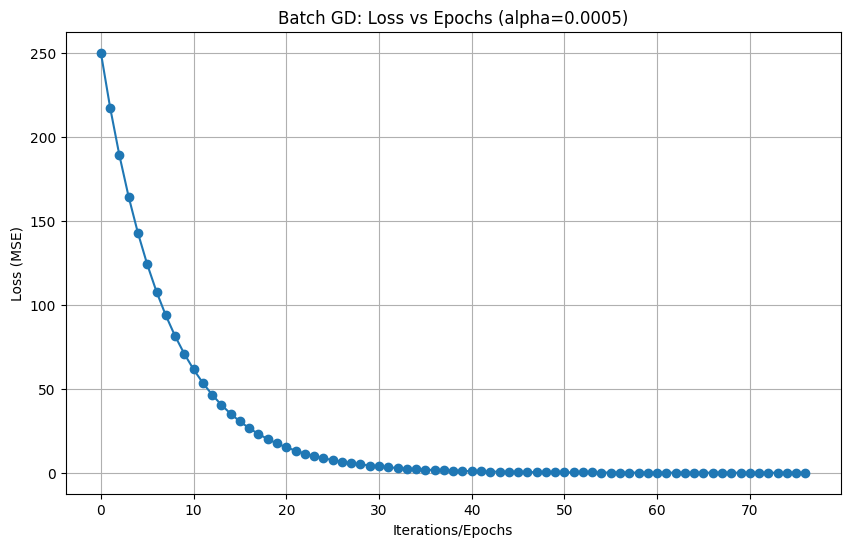

In [10]:
plot_loss_vs_epochs(stored_loss, "Batch GD: Loss vs Epochs (alpha=0.0005)")


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

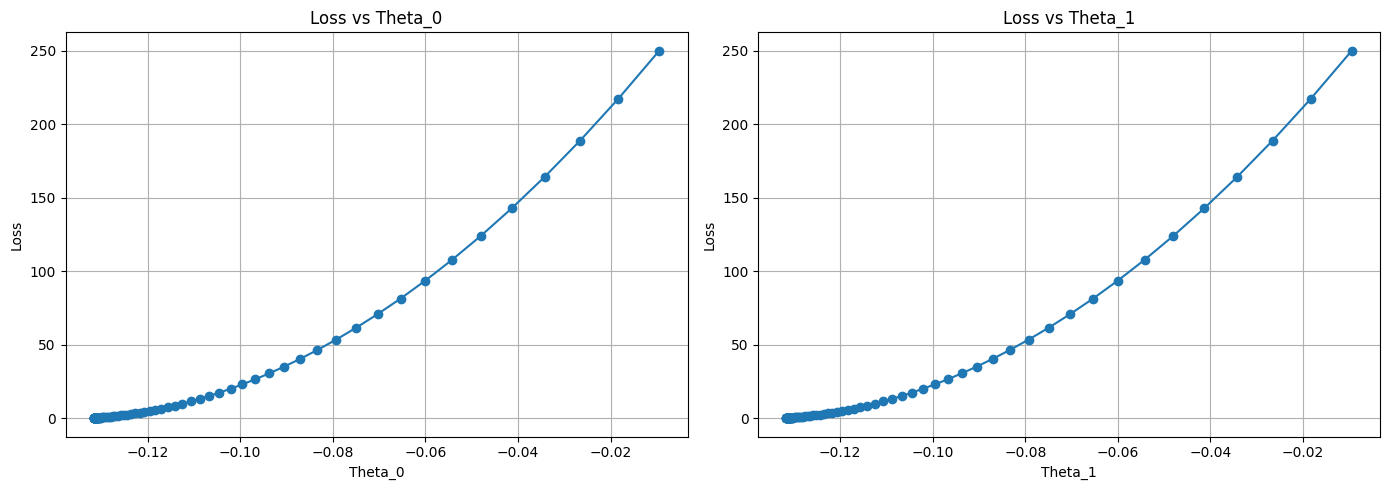

In [11]:
plot_theta_vs_loss(stored_theta_0, stored_theta_0, stored_loss)


#### Plot all regression lines till converge

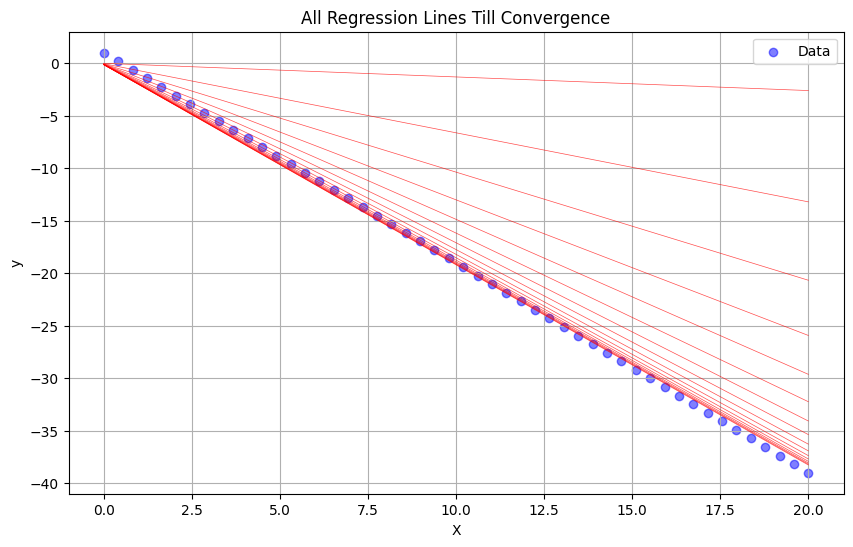

In [12]:
plot_all_regression_lines(X, y, stored_theta_0, stored_theta_1)


#### Plot the best regression line

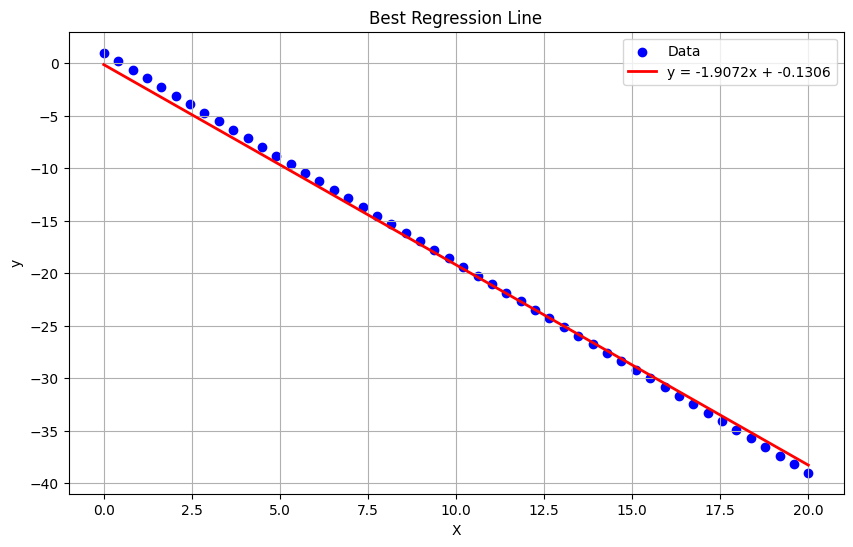

In [13]:
plot_best_regression_line(X, y, theta_0, theta_1)


#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

****************** Iteration 0 ********************
h(x): 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error vector 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j= 
249.88775510204087

grad vector 
[ 19.        259.3877551]
grad vector norm 
260.08269357432516
theta 0 new  -0.00095
theta 1 new  -0.012969387755102042
******

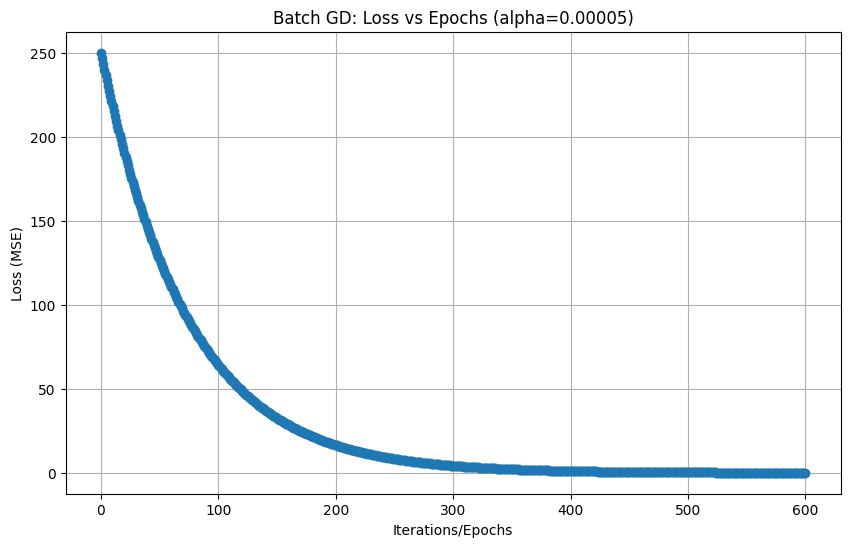

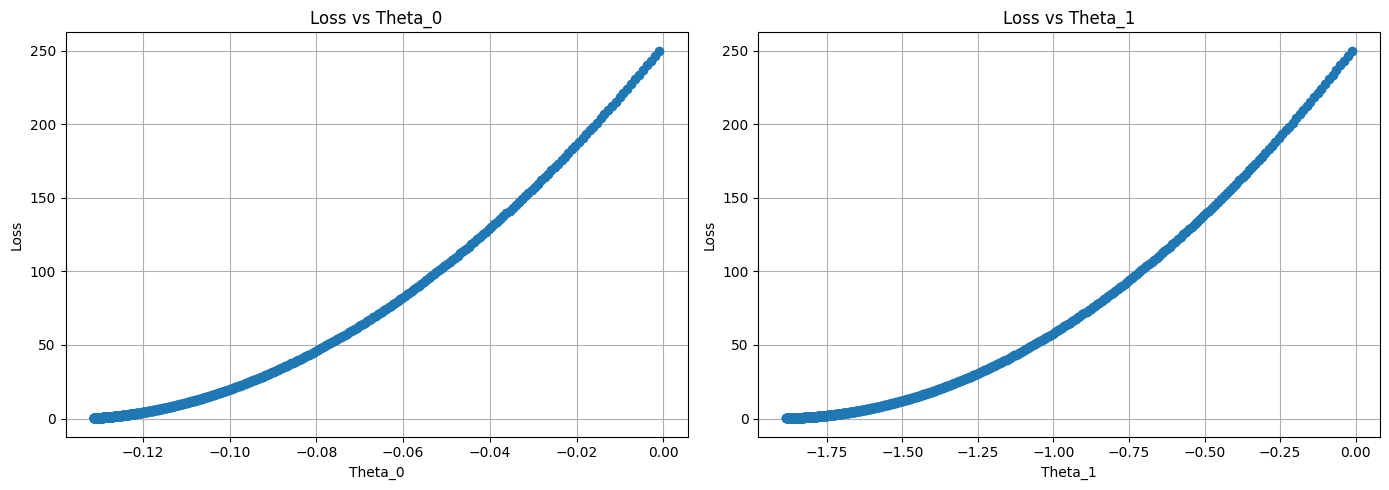

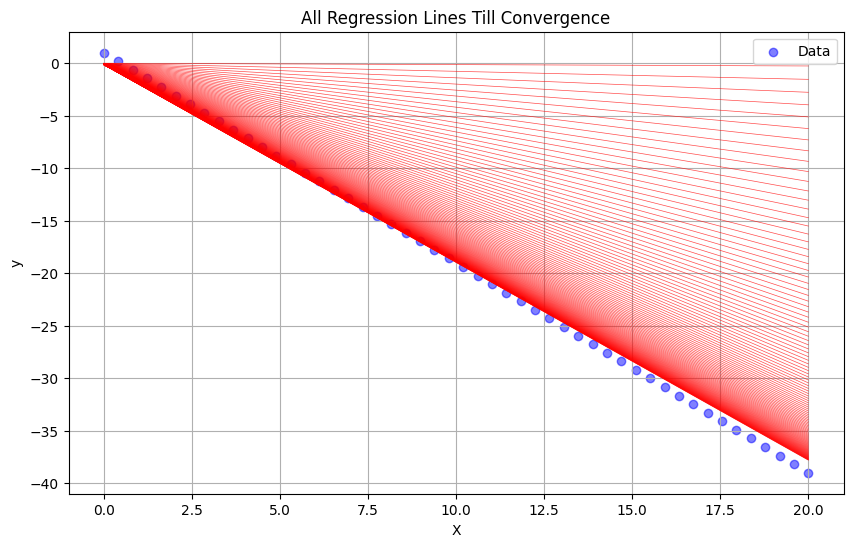

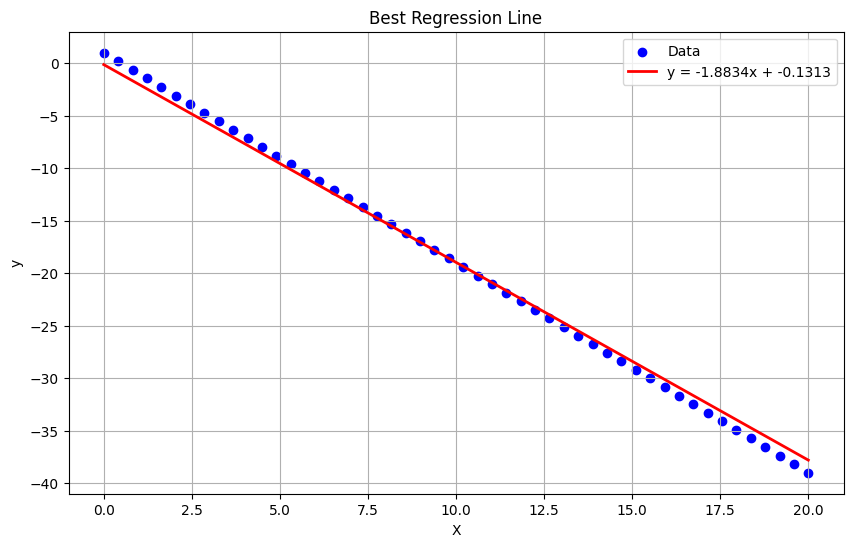

In [14]:
h_final2,theta_0_opt2,theta_1_opt2,   theta_0_hist2, theta_1_hist2, loss_hist2  = batch_gradient_descent(X, y, LR=0.00005, max_iter=1000)
plot_loss_vs_epochs(loss_hist2, "Batch GD: Loss vs Epochs (alpha=0.00005)")
plot_theta_vs_loss(theta_0_hist2, theta_1_hist2, loss_hist2)
plot_all_regression_lines(X, y, theta_0_hist2, theta_1_hist2, 5)
plot_best_regression_line(X, y, theta_0_opt2, theta_1_opt2)


In [ ]:
r2_score(y, h_final2)

0.9965793400861428

##### The following results uses alpha = 0.005 and max. iterations = 300.

****************** Iteration 0 ********************
h(x): 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error vector 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j= 
249.88775510204087

grad vector 
[ 19.        259.3877551]
grad vector norm 
260.08269357432516
theta 0 new  -0.095
theta 1 new  -1.2969387755102042
**********

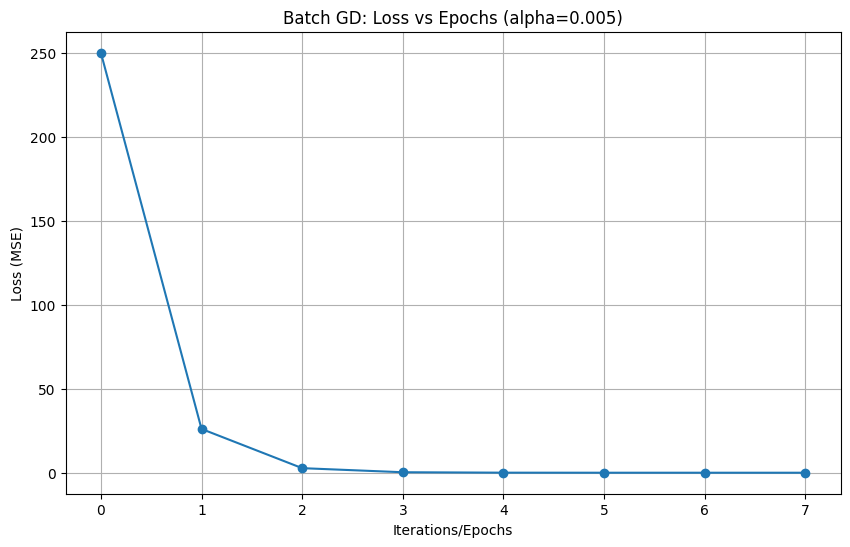

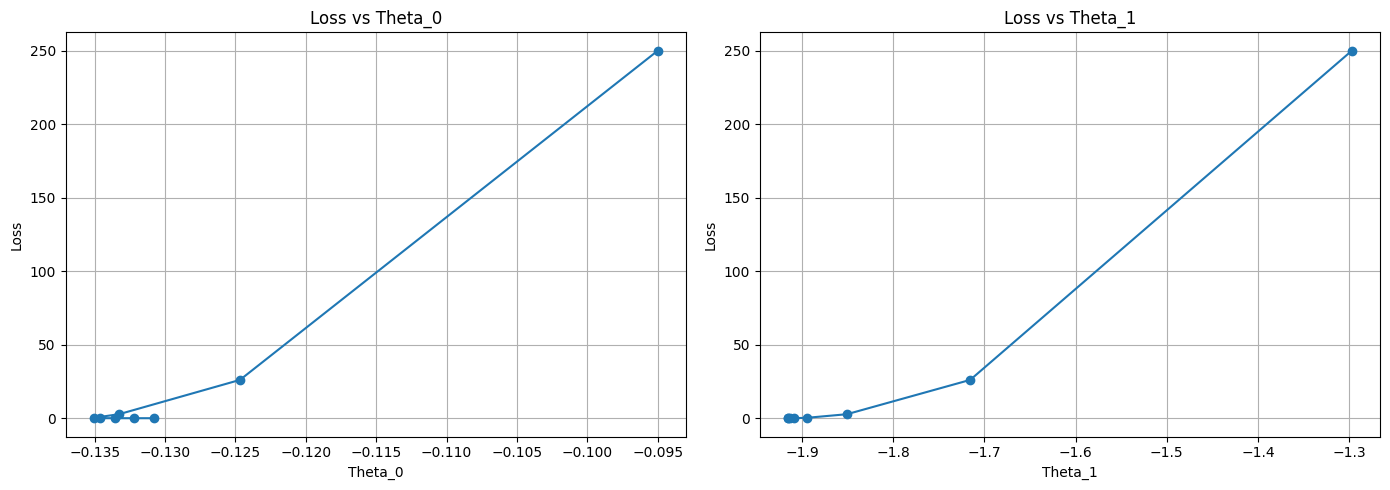

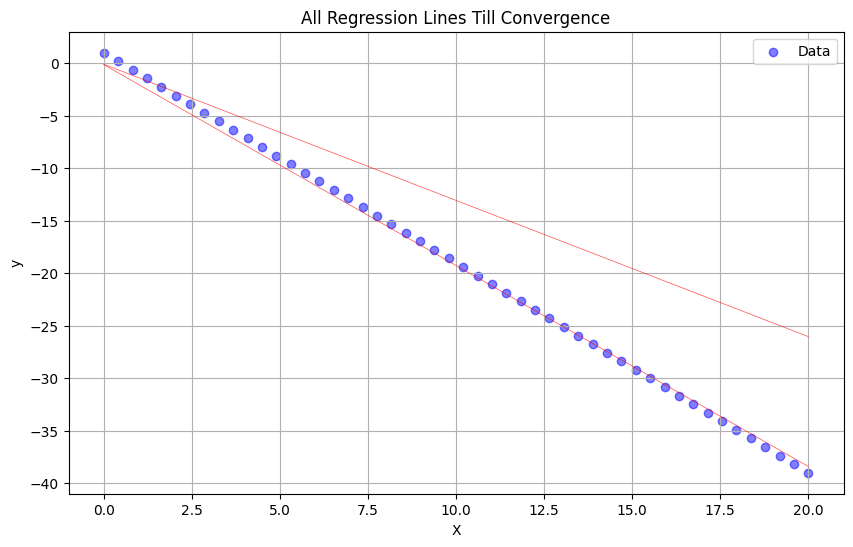

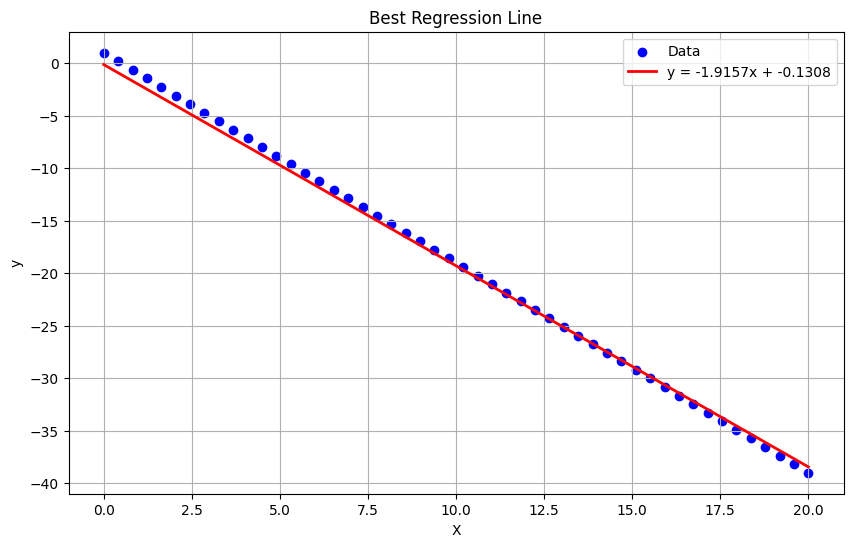

In [15]:
h_final3,theta_0_opt3,theta_1_opt3,   theta_0_hist3, theta_1_hist3, loss_hist3  = batch_gradient_descent(X, y, LR=0.005, max_iter=1000)
plot_loss_vs_epochs(loss_hist3, "Batch GD: Loss vs Epochs (alpha=0.005)")
plot_theta_vs_loss(theta_0_hist3, theta_1_hist3, loss_hist3)
plot_all_regression_lines(X, y, theta_0_hist3, theta_1_hist3, 5)
plot_best_regression_line(X, y, theta_0_opt3, theta_1_opt3)


In [ ]:
r2_score(y, h_final3)

0.9976200723230484

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [ ]:
def stochastic_gradient_descent(X, y, LR=0.0005, max_iter=300, cost_threshold=0.001):
    """
    Stochastic Gradient Descent for single variable linear regression
    """
    # 1- initialize
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    
    theta_0_history = []
    theta_1_history = []
    loss_history = []
    grad_0_history = []
    grad_1_history = []
    epoch_losses = []
    
    for epoch in range(max_iter):
        # 1.2 Suffle
        np.random.seed(101)  
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        epoch_loss = 0
        
        # for each epoch, there are iterations as many as the samples in the data (m)
        for i in range(m):
            xi = X_shuffled[i]
            yi = y_shuffled[i]
            
            # 2- predict -> single sample
            h = theta_0 + theta_1 * xi
            
            # 3- cost -> single sample
            cost = 0.5 * (h - yi)**2
            
            # 4- grad -> single sample
            grad_0 = (h - yi)
            grad_0_history.append(grad_0)
            grad_1 = (h - yi) * xi
            grad_1_history.append(grad_1)
            
            # 5- update -> based on one single sample
            theta_0 -= LR * grad_0
            theta_1 -= LR * grad_1
            
            # values (per iteration)
            theta_0_history.append(theta_0)
            theta_1_history.append(theta_1)
            loss_history.append(cost)
            
            epoch_loss += cost
        
        # after each epoch
        print(f'****************** Epoch {epoch} ********************')
        # average loss ==>>  the epoch
        epoch_loss /= m
        print('(average) cost ', epoch_loss)
        print('grad vector ', np.sum(grad_0_history)/m,' ', np.sum(grad_1_history)/m)
        print('vector norm ', np.sqrt((np.sum(grad_0_history)/m)**2 +(np.sum(grad_1_history)/m) **2))
        epoch_losses.append(epoch_loss)
        print('theta values are ', theta_0, ' ', theta_1)
        
        # Convergence check ==>> per epoch
        if epoch > 0:
            cost_change = abs(epoch_losses[-2] - epoch_losses[-1])
            if cost_change < cost_threshold:
                print(f"SGD converged at epoch {epoch} (cost check)")
                break
    
    h_final = theta_0 + theta_1 * X
    
    return theta_0_history, theta_1_history, loss_history, h_final, theta_0, theta_1



##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [23]:
# Run SGD with different learning rates
print("\n--- SGD with alpha=0.0005, max_iter=300 ---")
theta_0_sgd, theta_1_sgd, loss_sgd, h_sgd, theta_0_sgd_opt, theta_1_sgd_opt = stochastic_gradient_descent(X, y, LR=0.0005, max_iter=300)



--- SGD with alpha=0.0005, max_iter=300 ---
****************** Epoch 0 ********************
cost  39.470422035279725
grad vector  5.1044888500848495   74.3713673402527
vector norm  74.54633516464406
theta values are  -0.12761222125212127   -1.8592841835063174
****************** Epoch 1 ********************
cost  0.20468403314238398
grad vector  4.959073854779563   76.39202332001032
vector norm  76.5528160188909
theta values are  -0.12397684636948911   -1.909800583000258
****************** Epoch 2 ********************
cost  0.16532306846563036
grad vector  4.6744095450192695   76.4685019122561
vector norm  76.61123866182612
theta values are  -0.1168602386254817   -1.9117125478064034
****************** Epoch 3 ********************
cost  0.1629475439361154
grad vector  4.387805484575868   76.49259887802768
vector norm  76.61834323505903
theta values are  -0.10969513711439667   -1.9123149719506927
****************** Epoch 4 ********************
cost  0.1608563202786305
grad vector  4.1029

In [ ]:
r2_score(y, h_sgd)

0.9989180746275375

In [30]:
print(len(loss_sgd))

3150


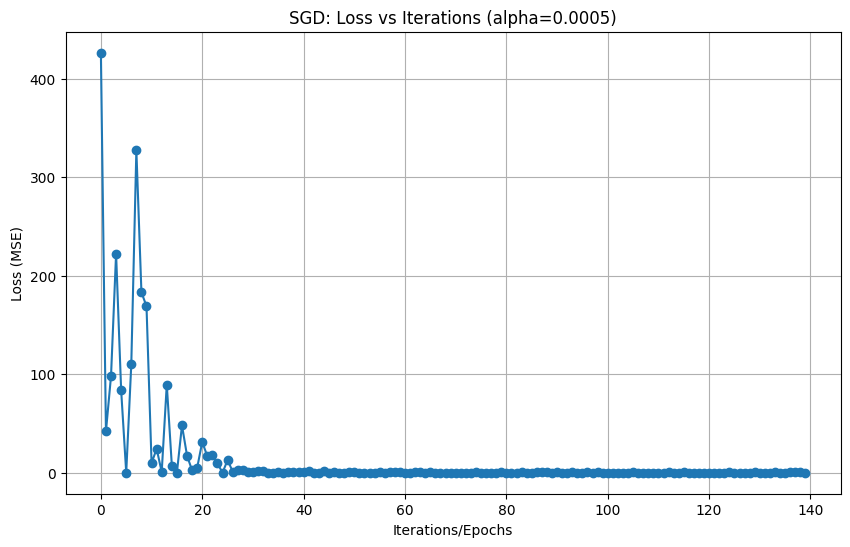

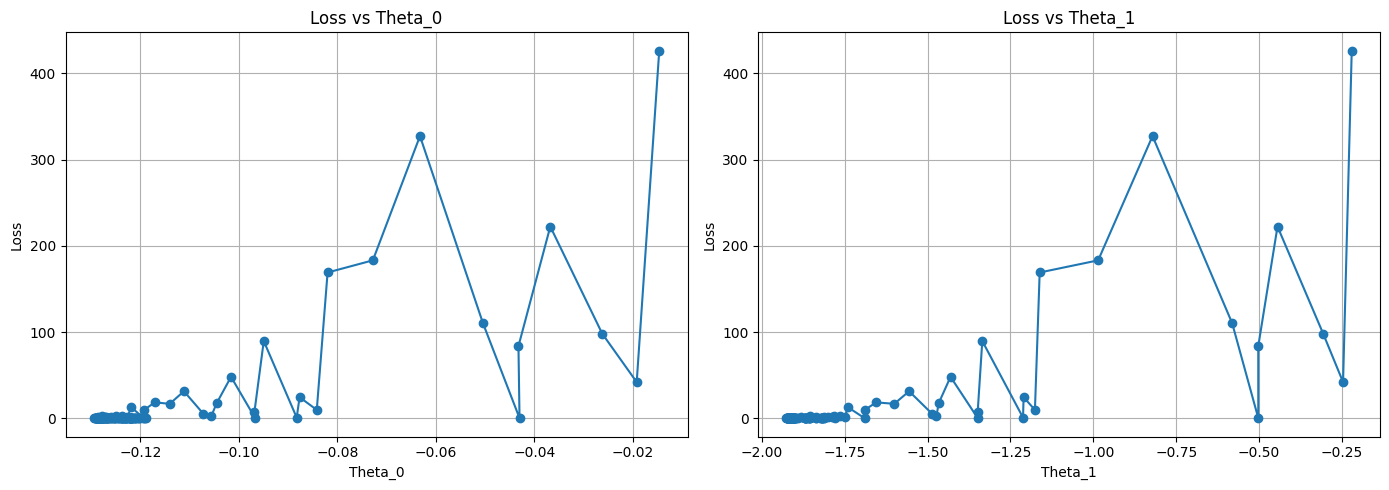

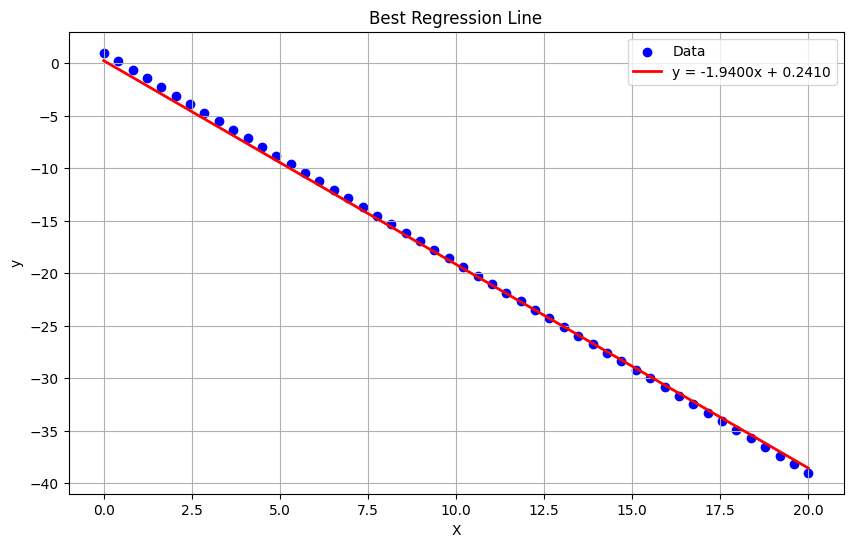

In [34]:
plot_loss_vs_epochs(loss_sgd[:140], "SGD: Loss vs Iterations (alpha=0.0005)")
plot_theta_vs_loss(theta_0_sgd[:140], theta_1_sgd[:140], loss_sgd[:140])
plot_best_regression_line(X, y, theta_0_sgd_opt, theta_1_sgd_opt)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [ ]:

theta_0_sgd, theta_1_sgd, loss_sgd, h_sgd, theta_0_sgd_opt, theta_1_sgd_opt = stochastic_gradient_descent(X, y, LR=0.0001, max_iter=300)

****************** Epoch 0 ********************
cost  139.57904702791961
grad vector  13.681889042613467   190.0148726337603
vector norm  190.50681328970504
theta values are  -0.0684094452130673   -0.9500743631688013
****************** Epoch 1 ********************
cost  35.5969610781511
grad vector  20.42932869655026   285.7467703260678
vector norm  286.47613202982586
theta values are  -0.10214664348275128   -1.428733851630339
****************** Epoch 2 ********************
cost  9.183854437906719
grad vector  23.683688045177107   333.98309817812697
vector norm  334.82178386132773
theta values are  -0.11841844022588549   -1.6699154908906342
****************** Epoch 3 ********************
cost  2.4679625079869
grad vector  25.178575040627784   358.2932632479188
vector norm  359.1768688681371
theta values are  -0.12589287520313883   -1.7914663162395936
****************** Epoch 4 ********************
cost  0.7569495425759974
grad vector  25.787303777579076   370.5504811642656
vector norm 

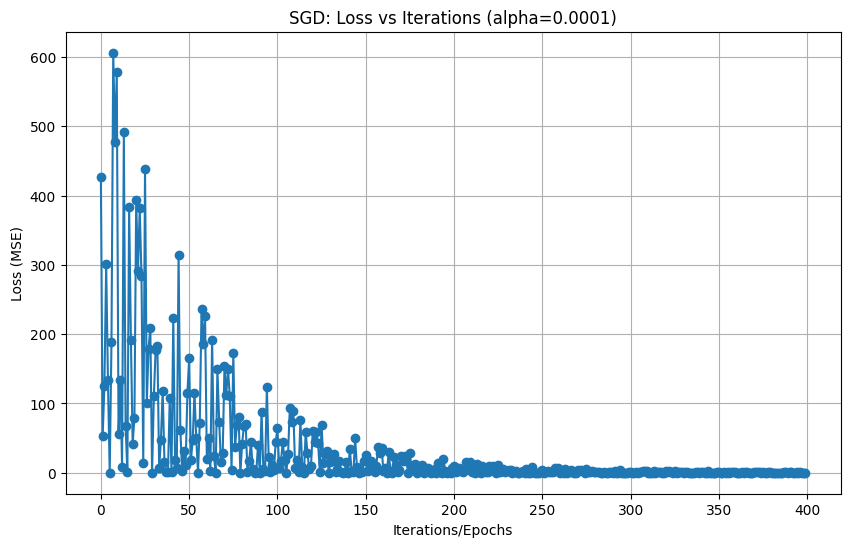

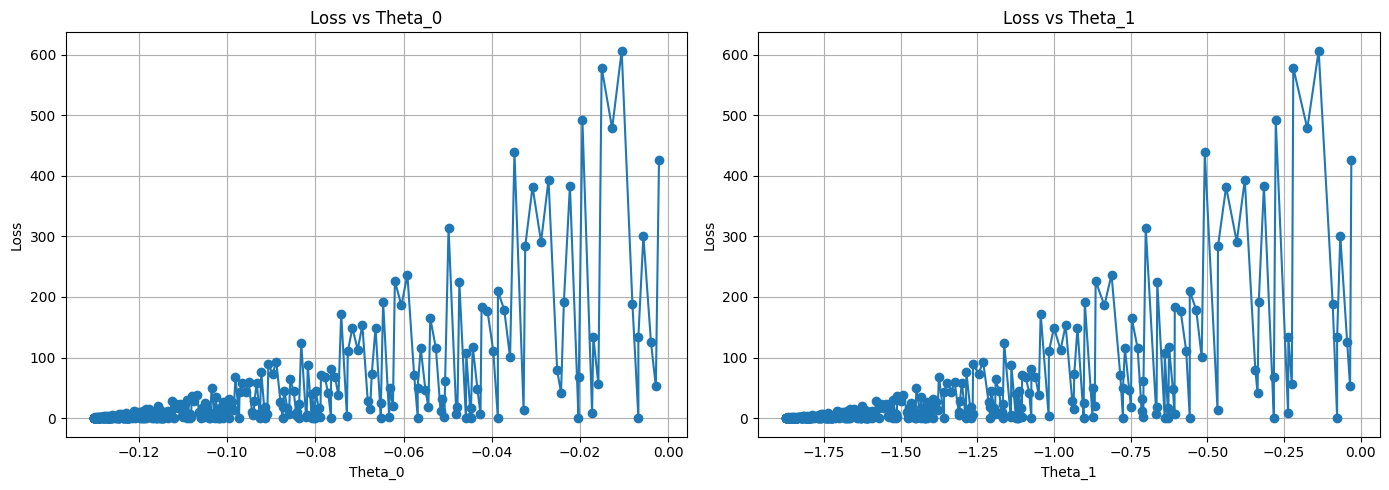

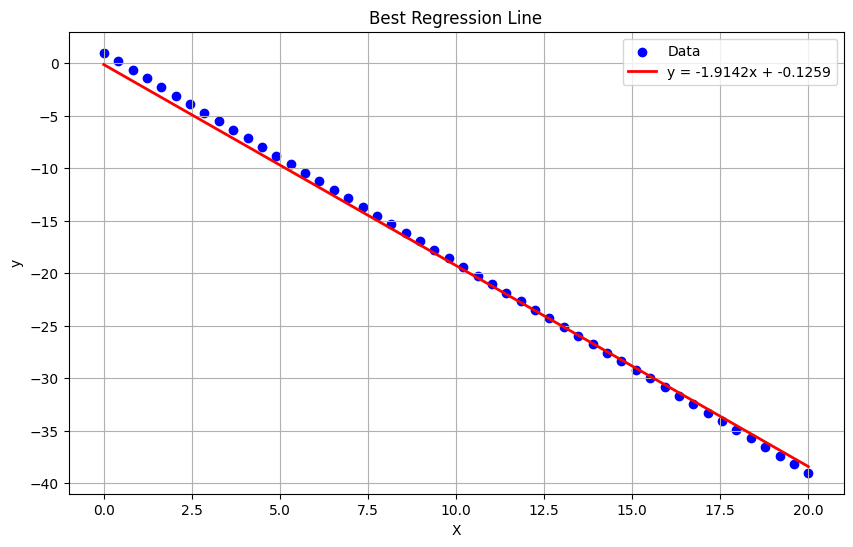

In [36]:

plot_loss_vs_epochs(loss_sgd[:400], "SGD: Loss vs Iterations (alpha=0.0001)")
plot_theta_vs_loss(theta_0_sgd[:400], theta_1_sgd[:400], loss_sgd[:400])
plot_best_regression_line(X, y, theta_0_sgd_opt, theta_1_sgd_opt)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

****************** Epoch 0 ********************
cost  163.82680552285262
grad vector  15.046456090913058   207.92922950598742
vector norm  208.47292467812065
theta values are  -0.0526625963181957   -0.7277523032709559
****************** Epoch 1 ********************
cost  63.09941487240788
grad vector  24.26310710117317   336.83760865635384
vector norm  337.71033885792417
theta values are  -0.08492087485410607   -1.1789316302972381
****************** Epoch 2 ********************
cost  24.375252157053815
grad vector  29.865828700892756   416.7591541331729
vector norm  417.8279074903792
theta values are  -0.10453040045312463   -1.4586570394661047
****************** Epoch 3 ********************
cost  9.484528074710374
grad vector  33.22829263374195   466.3126374328116
vector norm  467.49502164290305
theta values are  -0.11629902421809676   -1.6320942310148396
****************** Epoch 4 ********************
cost  3.7563996925854894
grad vector  35.20206923358913   497.04025937974734
vector 

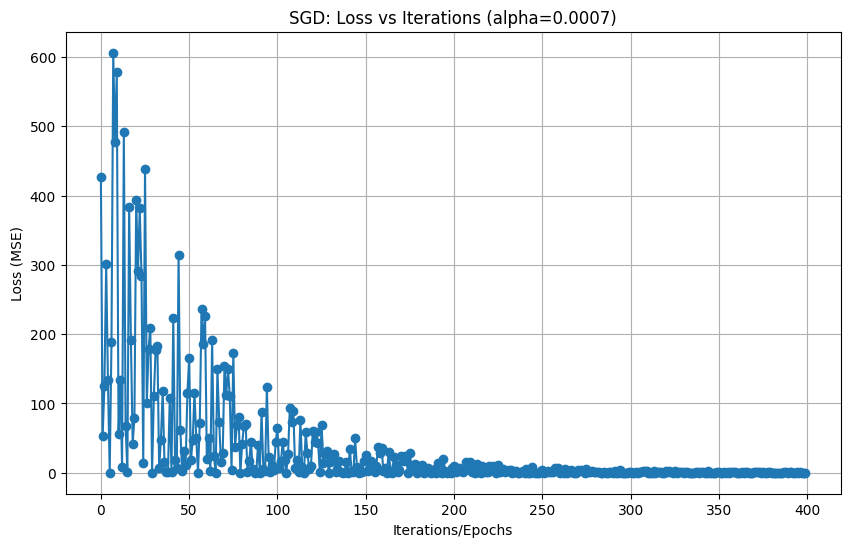

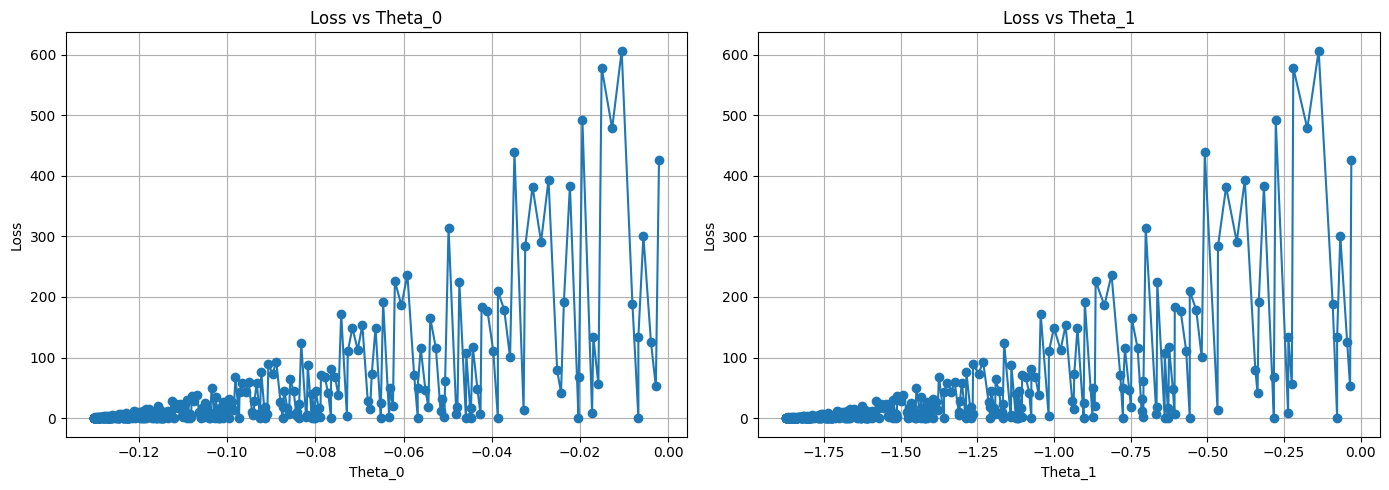

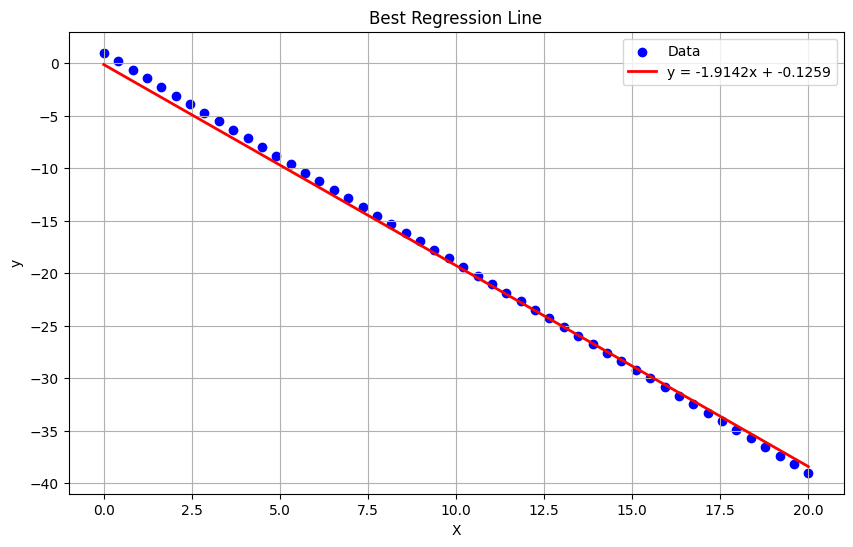

In [35]:
theta_0_sgd, theta_1_sgd, loss_sgd, h_sgd, theta_0_sgd_opt, theta_1_sgd_opt = stochastic_gradient_descent(X, y, LR=0.00007, max_iter=300)
print(f"SGD Optimum theta_0: {theta_0_sgd_opt:.6f}")
print(f"SGD Optimum theta_1: {theta_1_sgd_opt:.6f}")
print(f"SGD R2 Score: {r2_score(y, h_sgd):.6f}")

plot_loss_vs_epochs(loss_sgd[:400], "SGD: Loss vs Iterations (alpha=0.0007)")
plot_theta_vs_loss(theta_0_sgd[:400], theta_1_sgd[:400], loss_sgd[:400])
plot_best_regression_line(X, y, theta_0_sgd_opt, theta_1_sgd_opt)

In [ ]:
r2_score(y, h_sgd)

0.9976426121570704

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [38]:
def mini_batch_gradient_descent(X, y, batch_size=5, LR=0.0005, max_iter=300,
                                cost_threshold=0.001):
    
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    
    theta_0_history = []
    theta_1_history = []
    loss_history = []
    epoch_losses = []
    
    for epoch in range(max_iter):
        np.random.seed(101)  
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        epoch_loss = 0
        num_batches = int(np.ceil(m / batch_size))

        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, m)
            
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            batch_m = len(X_batch)
            
            
            h = theta_0 + theta_1 * X_batch
            
            # cost -> per batch
            cost = (1/(2*batch_m)) * np.sum((h - y_batch)**2)
            
            # grad -> per batch
            grad_0 = (1/batch_m) * np.sum(h - y_batch)
            grad_1 = (1/batch_m) * np.sum((h - y_batch) * X_batch)
            
            # update -> based on batch gradietn
            theta_0 -= LR * grad_0
            theta_1 -= LR * grad_1
            
            # save values -> per iteration/batch
            theta_0_history.append(theta_0)
            theta_1_history.append(theta_1)
            loss_history.append(cost)
            
            epoch_loss += cost * batch_m
        # after each epoch
        print(f'****************** Epoch {epoch} ********************')
        
        # avg loss -> per epoch -> all batches
        epoch_loss /= m
        print('avg loss ', epoch_loss)
        epoch_losses.append(epoch_loss)
        print('theta values are ', theta_0, ' ', theta_1)
        
        # Convergence check per epoch
        if epoch > 0:
            cost_change = abs(epoch_losses[-2] - epoch_losses[-1])
            if cost_change < cost_threshold:
                print(f"Mini-Batch GD converged at epoch {epoch} (cost check)")
                break
    
    h_final = theta_0 + theta_1 * X
    
    return theta_0_history, theta_1_history, loss_history, h_final, theta_0, theta_1



##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [39]:
theta_0_mb, theta_1_mb, loss_mb, h_mb, theta_0_mb_opt, theta_1_mb_opt = mini_batch_gradient_descent(X, y, batch_size=5, LR=0.0005, max_iter=300)



****************** Epoch 0 ********************
avg loss  145.77747144624746
theta values are  -0.06978924724113063   -0.9693635987180409
****************** Epoch 1 ********************
avg loss  35.714317832049026
theta values are  -0.103504017832776   -1.44799256525687
****************** Epoch 2 ********************
avg loss  8.859188609237764
theta values are  -0.11940982177970424   -1.6843464761632723
****************** Epoch 3 ********************
avg loss  2.299335899730069
theta values are  -0.12652431396007574   -1.8010894682190426
****************** Epoch 4 ********************
avg loss  0.6932682543872251
theta values are  -0.12929949643754896   -1.858780649964289
****************** Epoch 5 ********************
avg loss  0.29810385683408264
theta values are  -0.1299333150292409   -1.8873179665446893
****************** Epoch 6 ********************
avg loss  0.19979735049037828
theta values are  -0.1295108912168696   -1.9014619907011472
****************** Epoch 7 **************

In [ ]:
r2_score(y, h_mb)

0.9976494321342575

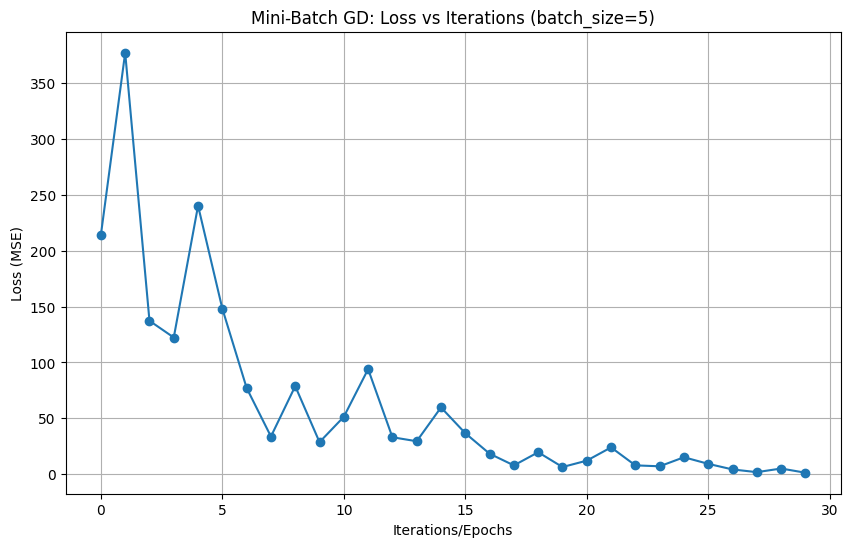

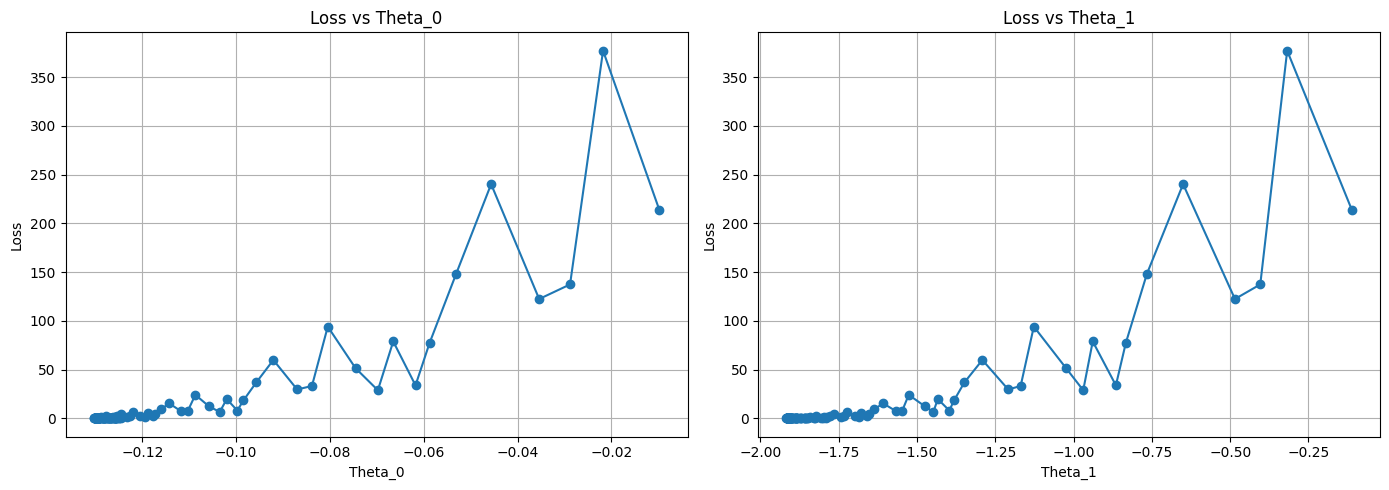

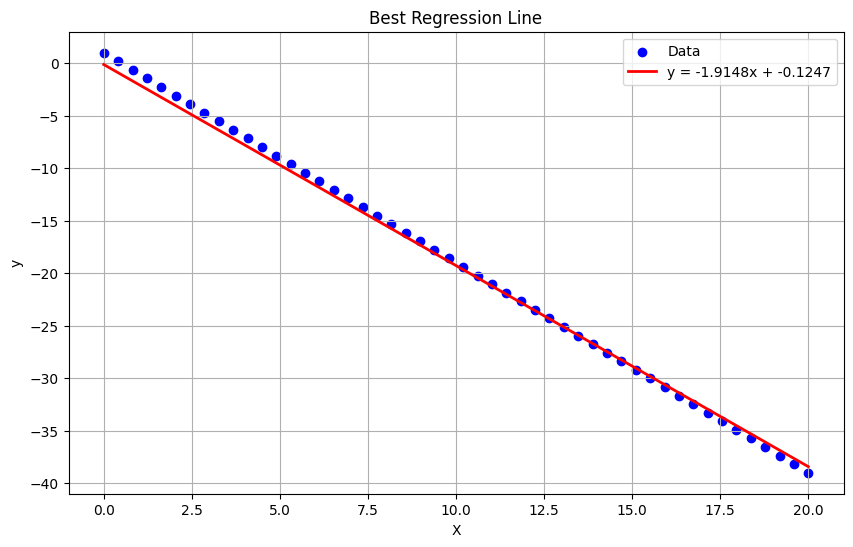

In [40]:
plot_loss_vs_epochs(loss_mb[:30], "Mini-Batch GD: Loss vs Iterations (batch_size=5)")
plot_theta_vs_loss(theta_0_mb, theta_1_mb, loss_mb)
plot_best_regression_line(X, y, theta_0_mb_opt, theta_1_mb_opt)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [41]:

theta_0_mb, theta_1_mb, loss_mb, h_mb, theta_0_mb_opt, theta_1_mb_opt = mini_batch_gradient_descent(X, y, batch_size=10, LR=0.0005, max_iter=300)



****************** Epoch 0 ********************
avg loss  194.14331348574814
theta values are  -0.04124848216567694   -0.5683087110235963
****************** Epoch 1 ********************
avg loss  96.12235720338664
theta values are  -0.07003863931709524   -0.9679738990170043
****************** Epoch 2 ********************
avg loss  47.63986244890192
theta values are  -0.0900679276338996   -1.2490447040747128
****************** Epoch 3 ********************
avg loss  23.657936948974847
theta values are  -0.10393649132998092   -1.4467169419665995
****************** Epoch 4 ********************
avg loss  11.793948900030655
theta values are  -0.11347281721001852   -1.5857411967280186
****************** Epoch 5 ********************
avg loss  5.923840928886778
theta values are  -0.11996274315499794   -1.6835227023835446
****************** Epoch 6 ********************
avg loss  3.018738309534677
theta values are  -0.12431050265662828   -1.752301257843225
****************** Epoch 7 *************

In [ ]:
r2_score(y, h_mb)

0.9976326359600513

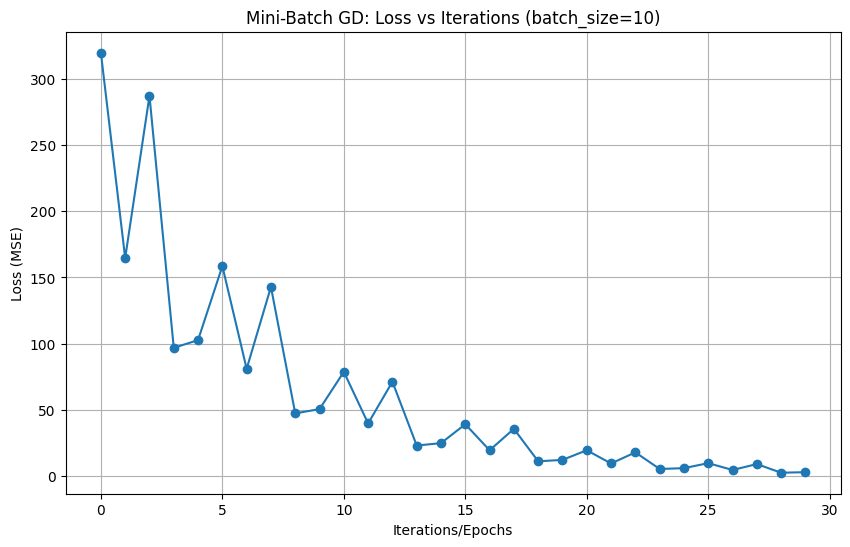

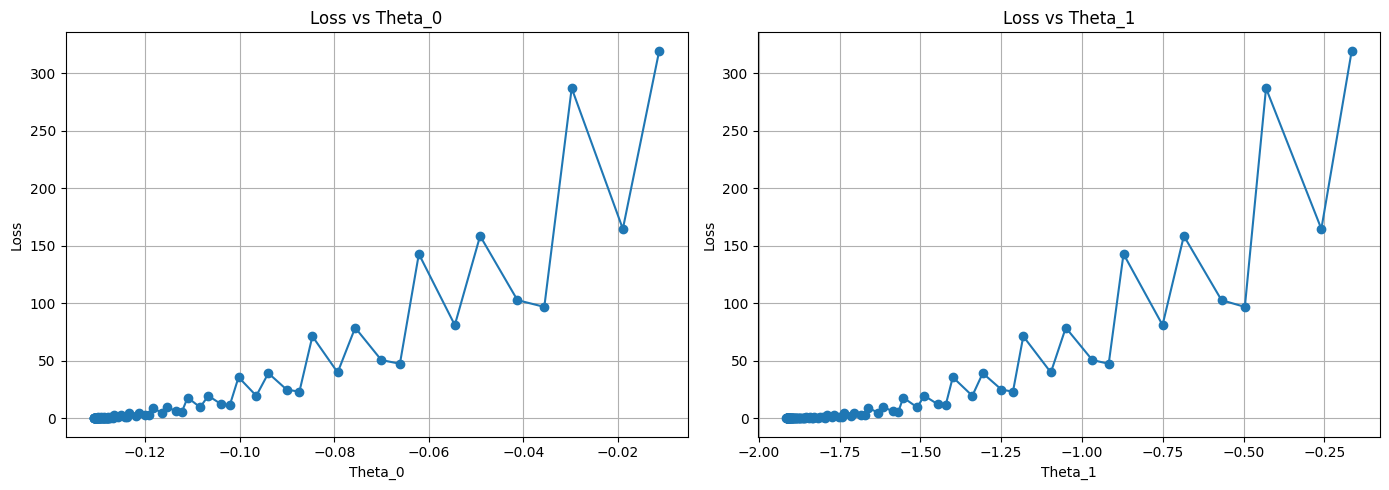

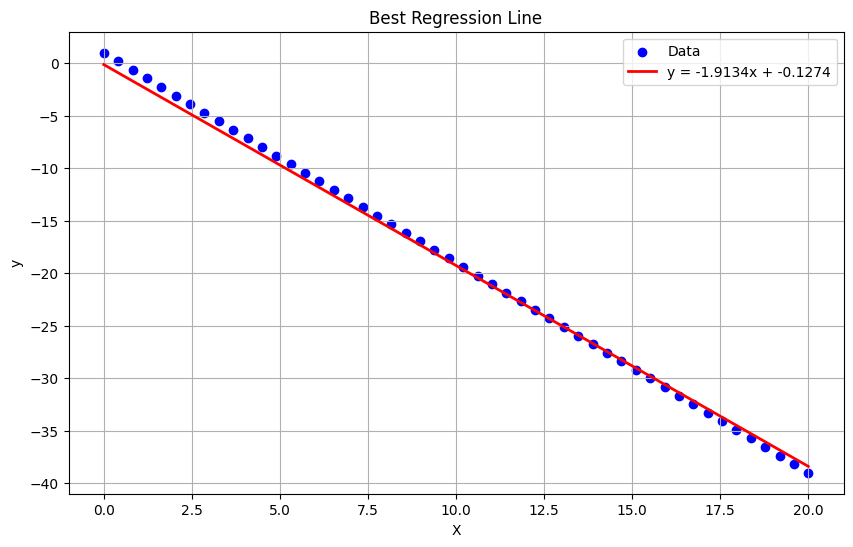

In [42]:
plot_loss_vs_epochs(loss_mb[:30], "Mini-Batch GD: Loss vs Iterations (batch_size=10)")
plot_theta_vs_loss(theta_0_mb, theta_1_mb, loss_mb)
plot_best_regression_line(X, y, theta_0_mb_opt, theta_1_mb_opt)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [ ]:

theta_0_mb, theta_1_mb, loss_mb, h_mb, theta_0_mb_opt, theta_1_mb_opt = mini_batch_gradient_descent(X, y, batch_size=20, LR=0.0005, max_iter=300)



****************** Epoch 0 ********************
avg loss  225.4782619525588
theta values are  -0.02580691049406296   -0.34956845854908747
****************** Epoch 1 ********************
avg loss  150.73429374844326
theta values are  -0.04681622152392541   -0.6352969942726102
****************** Epoch 2 ********************
avg loss  100.79206446150798
theta values are  -0.06390421550487006   -0.8688455261450847
****************** Epoch 3 ********************
avg loss  67.42061888195545
theta values are  -0.07778712789992066   -1.0597443693715909
****************** Epoch 4 ********************
avg loss  45.120822384507
theta values are  -0.08905037869167234   -1.2157831928262341
****************** Epoch 5 ********************
avg loss  30.218641841167017
theta values are  -0.09817246492743106   -1.3433289360975034
****************** Epoch 6 ********************
avg loss  20.259382962944482
theta values are  -0.10554448945579435   -1.4475856611782882
****************** Epoch 7 ***********

In [ ]:
r2_score(y, h_mb)

0.9976084025322288

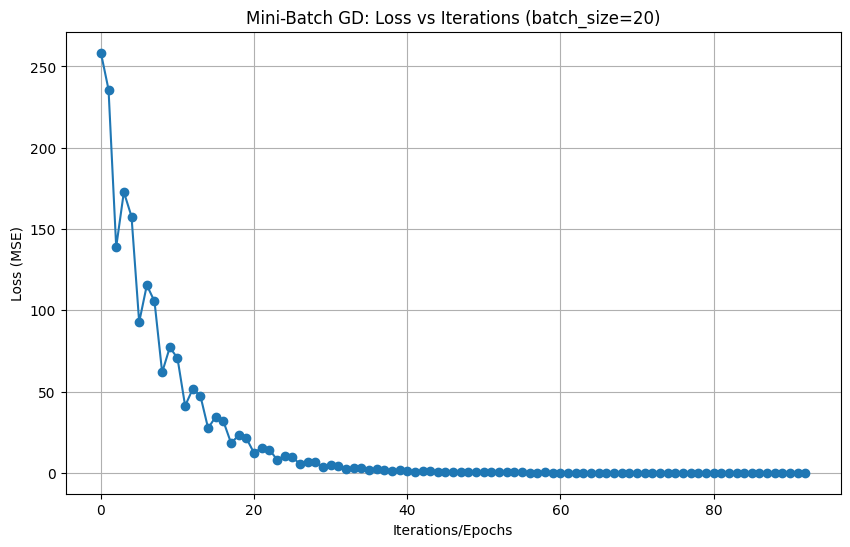

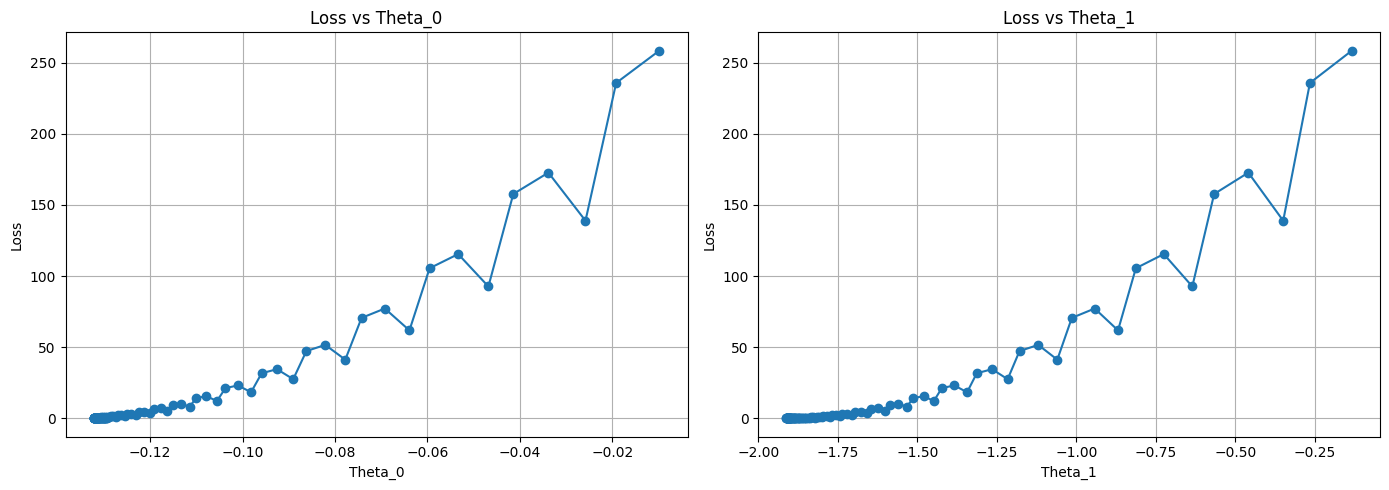

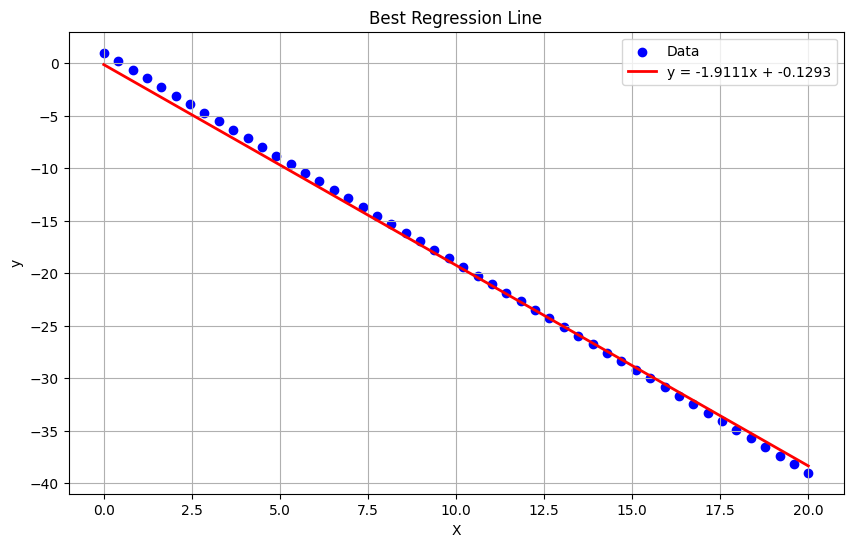

In [ ]:
plot_loss_vs_epochs(loss_mb, "Mini-Batch GD: Loss vs Iterations (batch_size=20)")
plot_theta_vs_loss(theta_0_mb, theta_1_mb, loss_mb)
plot_best_regression_line(X, y, theta_0_mb_opt, theta_1_mb_opt)